In [6]:
!pip install pandas-profiling --quiet

In [7]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [8]:
from urllib.request import urlretrieve

In [9]:
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x25bdccefa90>)

In [11]:
import pandas as pd

In [12]:
medical_df = pd.read_csv("medical.csv")
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [13]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [15]:
!pip install jovian 

In [16]:
import jovian

<IPython.core.display.Javascript object>

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [18]:
!pip install plotly matplotlib seaborn --quiet

In [19]:
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [20]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [21]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

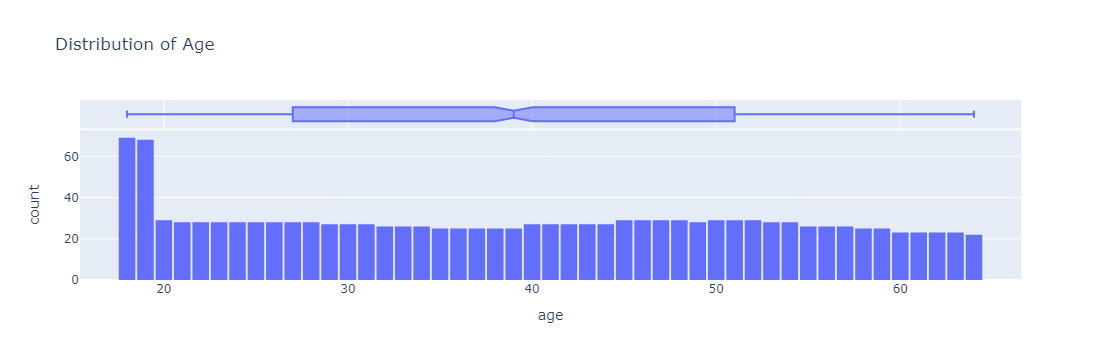

In [22]:
fig = px.histogram(medical_df, 
                  x = 'age', 
                  marginal = 'box',
                   nbins = 47,
                   title = 'Distribution of Age'
                  )
fig.update_layout(bargap = 0.1)
fig.show()

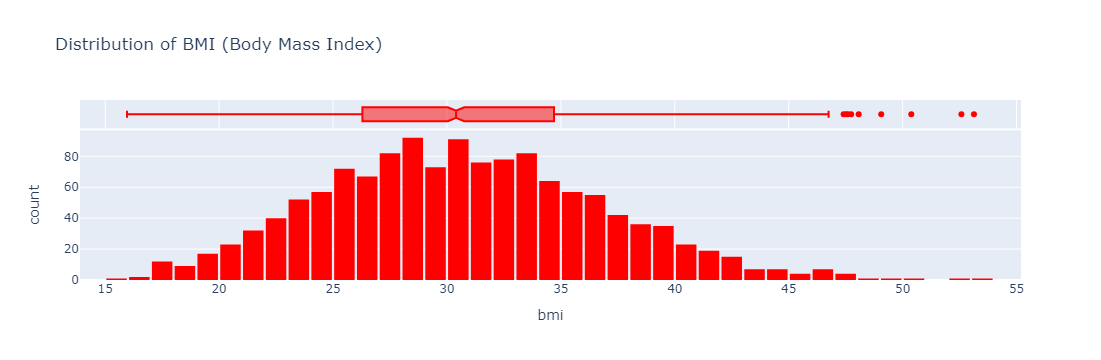

In [23]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribution of BMI (Body Mass Index)'
                  )
fig.update_layout(bargap = 0.1)
fig.show()

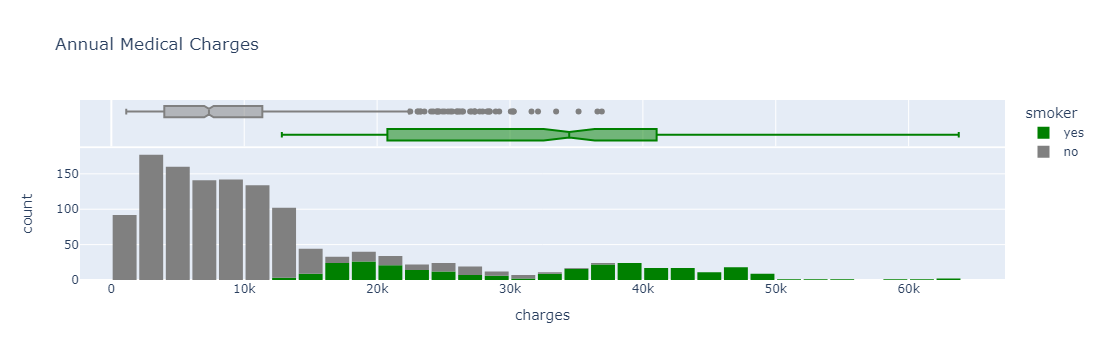

In [24]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'smoker',
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges'
                  )
fig.update_layout(bargap = 0.1)
fig.show()

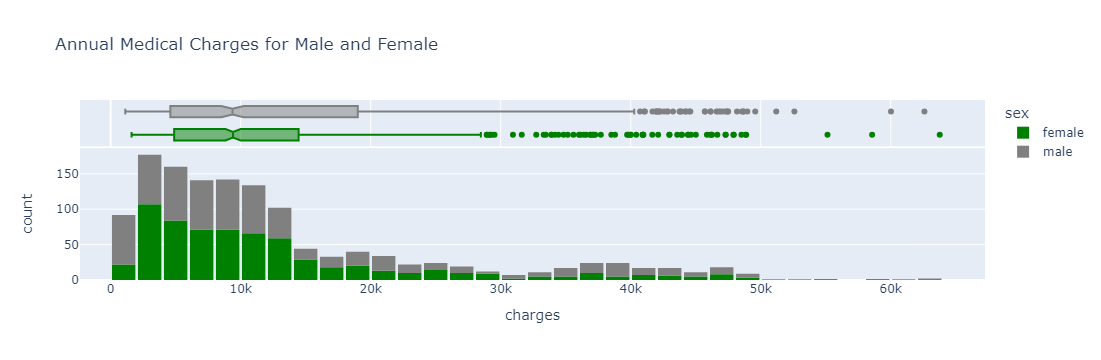

In [25]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges for Male and Female'
                  )
fig.update_layout(bargap = 0.1)
fig.show()

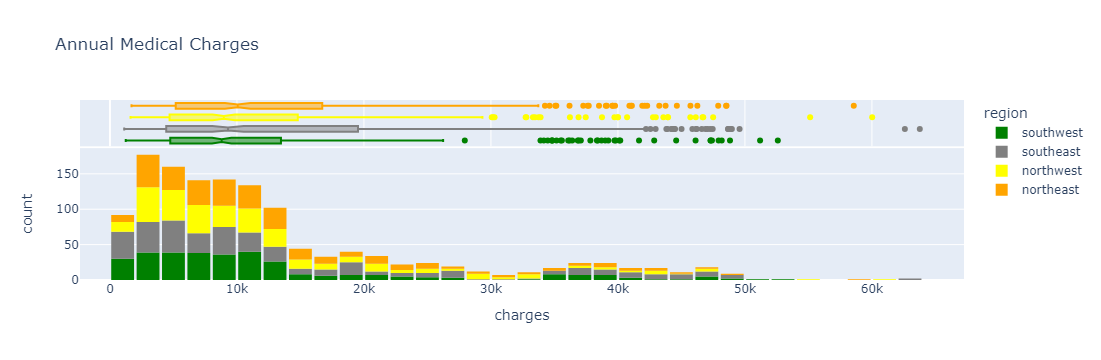

In [26]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color = 'region',
                   color_discrete_sequence = ['green', 'grey', 'yellow', 'orange'],
                   title = 'Annual Medical Charges'
                  )
fig.update_layout(bargap = 0.1)
fig.show()

In [27]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

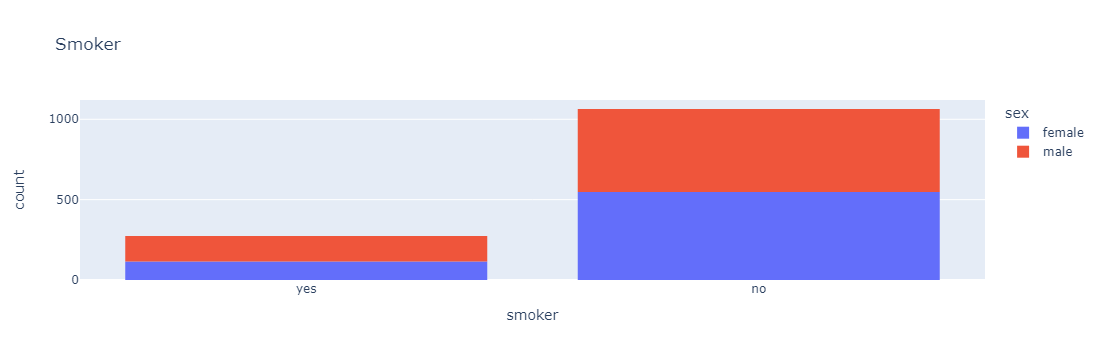

In [28]:
px.histogram(medical_df,
             x = 'smoker',
             color = 'sex',
             title = 'Smoker'
            )

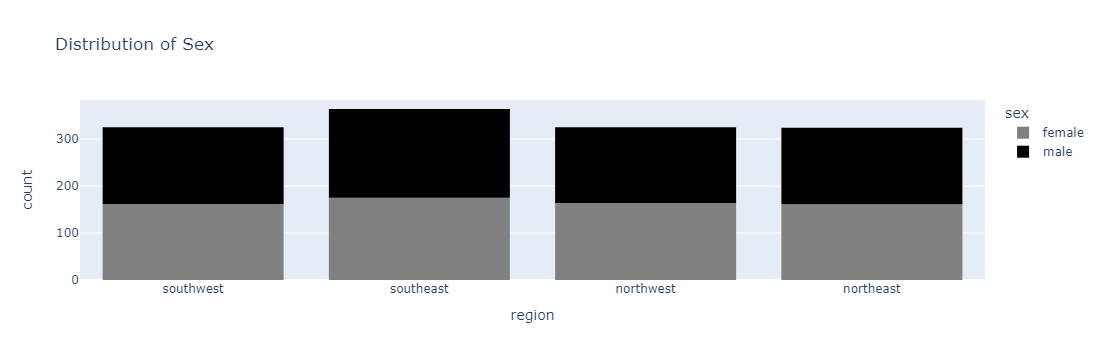

In [29]:
px.histogram(medical_df, x='region', 
             color='sex',
             color_discrete_sequence =  ['grey', 'black'],
             title='Distribution of Sex'
            )

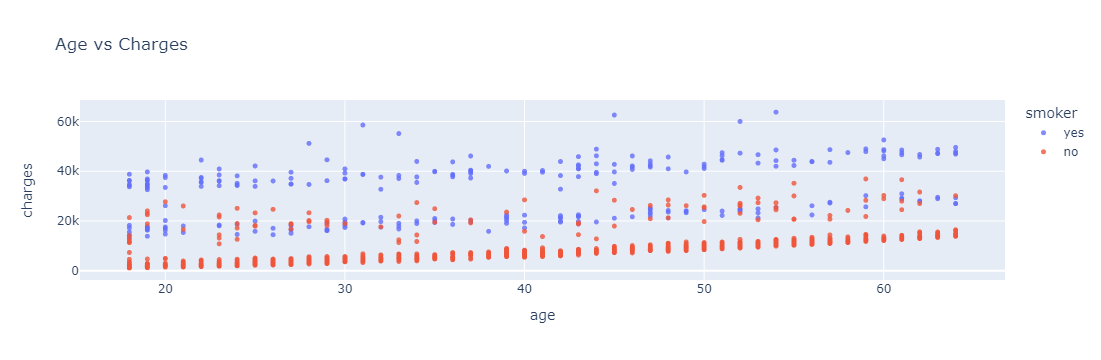

In [30]:
fig = px.scatter(medical_df, 
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8,
                 hover_data = ['sex'],
                 title = 'Age vs Charges'
                 )
fig.update_traces(marker_size = 5)
fig.show()

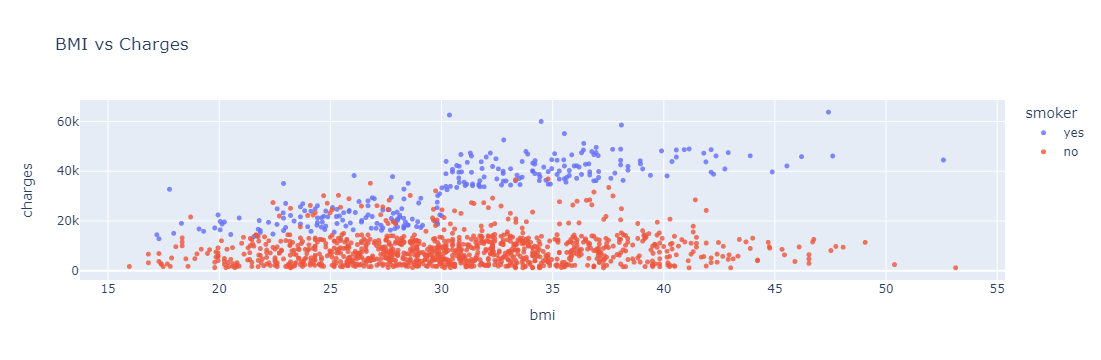

In [31]:
fig = px.scatter(medical_df, 
                   x = 'bmi',
                   y = 'charges',
                   color = 'smoker',
                   opacity = 0.8,
                   hover_data = ['sex'],
                   title = "BMI vs Charges"
                  )
fig.update_traces(marker_size = 5)
fig.show()

In [32]:
medical_df.charges.corr(medical_df.age)


0.2990081933306476

In [33]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362878

In [34]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df['Smoker_Numeric'] = smoker_numeric
medical_df['Smoker_Numeric'] 

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: Smoker_Numeric, Length: 1338, dtype: int64

In [35]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Smoker_Numeric  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1333               0  
1334               0  
1335               0  
1336               0  
1337               1  

[1338 rows x 8 columns]

In [36]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

In [37]:
numeric_df = medical_df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
correlation_matrix

age       bmi  children   charges  Smoker_Numeric
age             1.000000  0.109272  0.042469  0.299008       -0.025019
bmi             0.109272  1.000000  0.012759  0.198341        0.003750
children        0.042469  0.012759  1.000000  0.067998        0.007673
charges         0.299008  0.198341  0.067998  1.000000        0.787251
Smoker_Numeric -0.025019  0.003750  0.007673  0.787251        1.000000

Text(0.5, 1.0, 'Correlation Matrix')

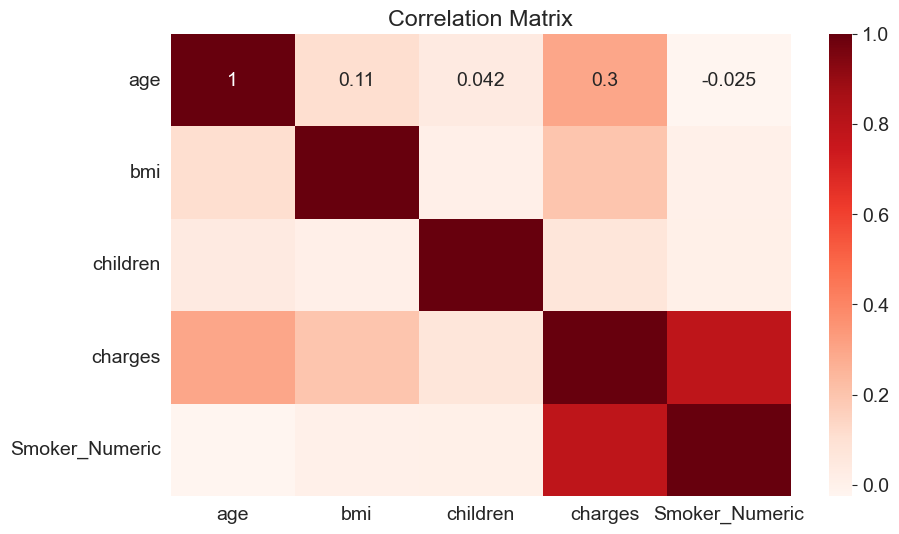

In [38]:
sns.heatmap(correlation_matrix, cmap = 'Reds', annot = True)
plt.title('Correlation Matrix')

In [39]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

age     sex     bmi  children smoker     region      charges  \
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
5      31  female  25.740         0     no  southeast   3756.62160   
...   ...     ...     ...       ...    ...        ...          ...   
1332   52  female  44.700         3     no  southwest  11411.68500   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   

      Smoker_Numeric  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
...              ...  
1332               0  
1333               0  
1334               0  
1335               0  
1336               0  

[1064 rows x 8 columns]

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

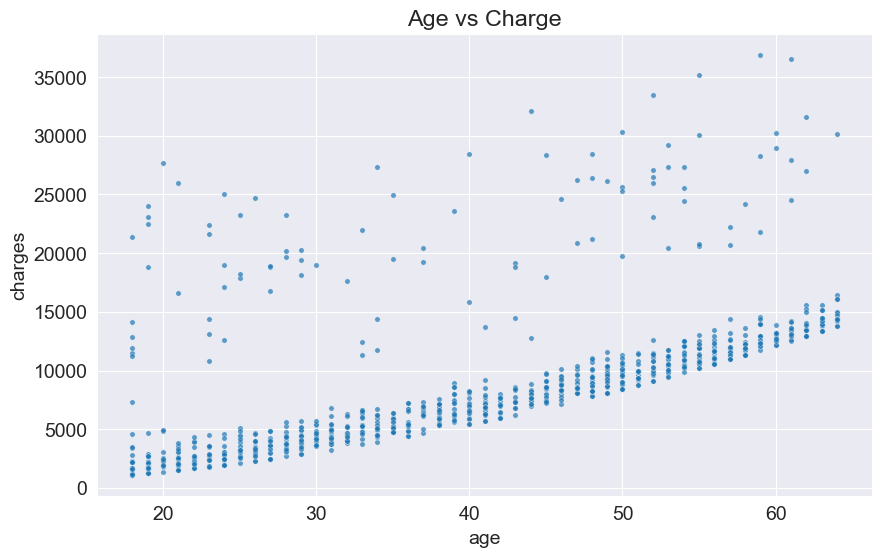

In [40]:
plt.title('Age vs Charge')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges',alpha = 0.7, s = 15)

In [41]:
def estimate_charges(age, w, b):
    return w * age + b

In [42]:
w = 50
b = 100

In [43]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

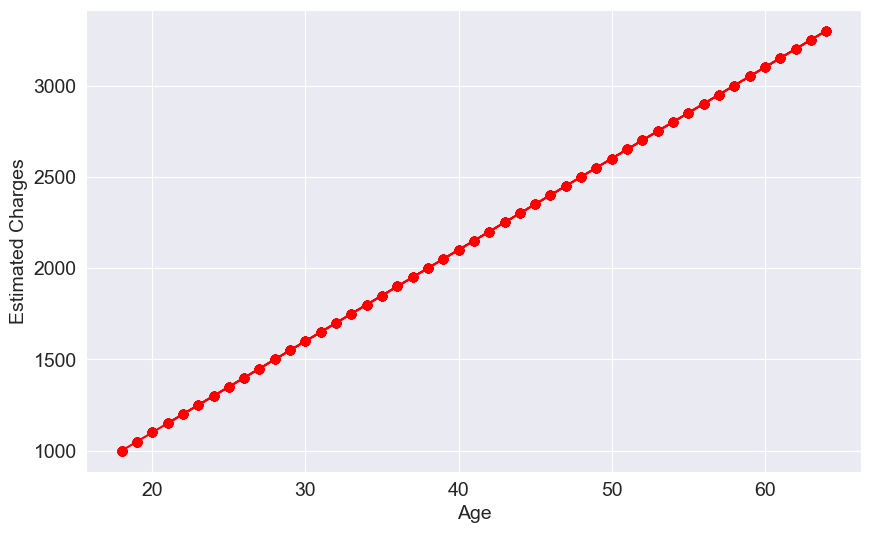

In [44]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

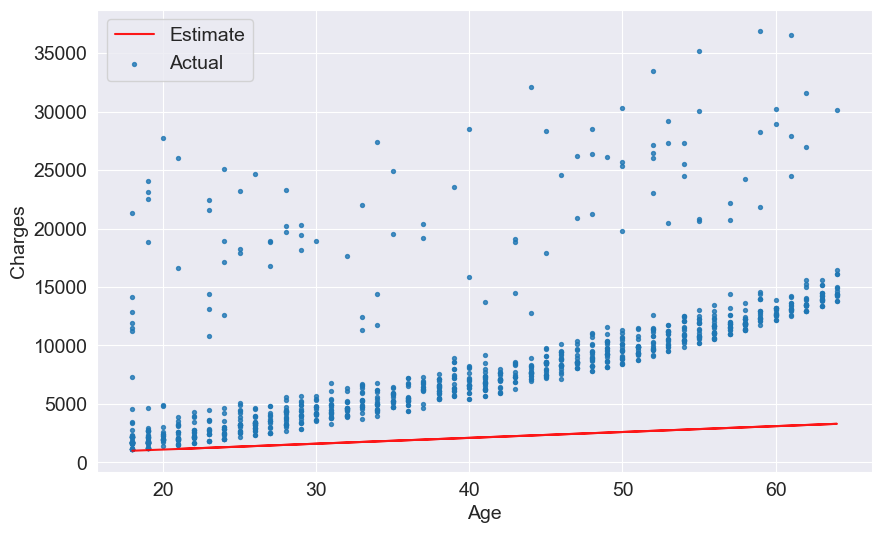

In [45]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [68]:
def try_parameter(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

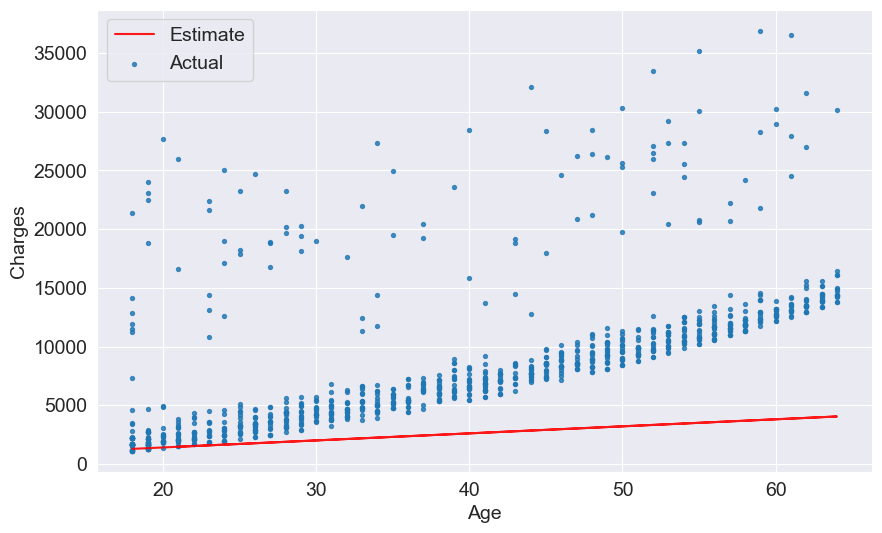

In [69]:
try_parameter(60, 200)

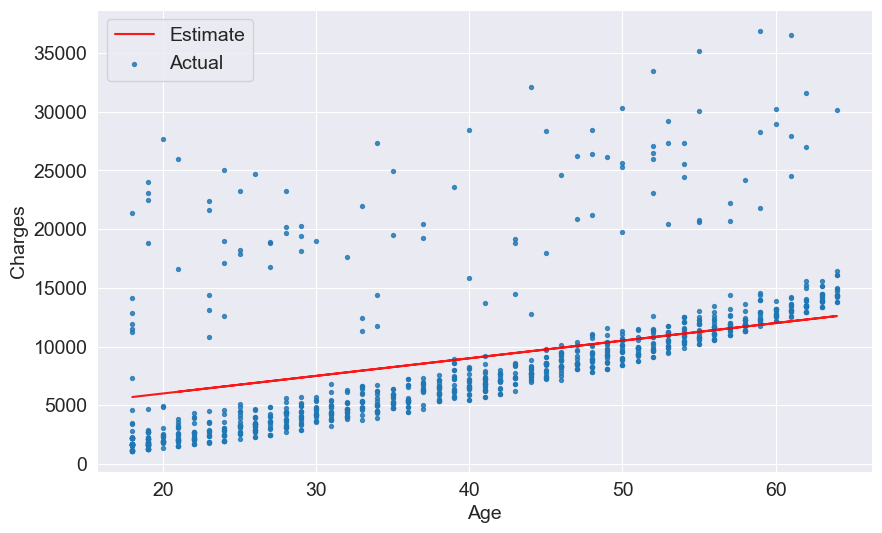

In [70]:
try_parameter(150, 3000 )

In [62]:
!pip install numpy --quiet

In [63]:
import numpy as np

In [49]:
!pip install scikit-learn --quiet

In [66]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [65]:
w = 50
b = 100

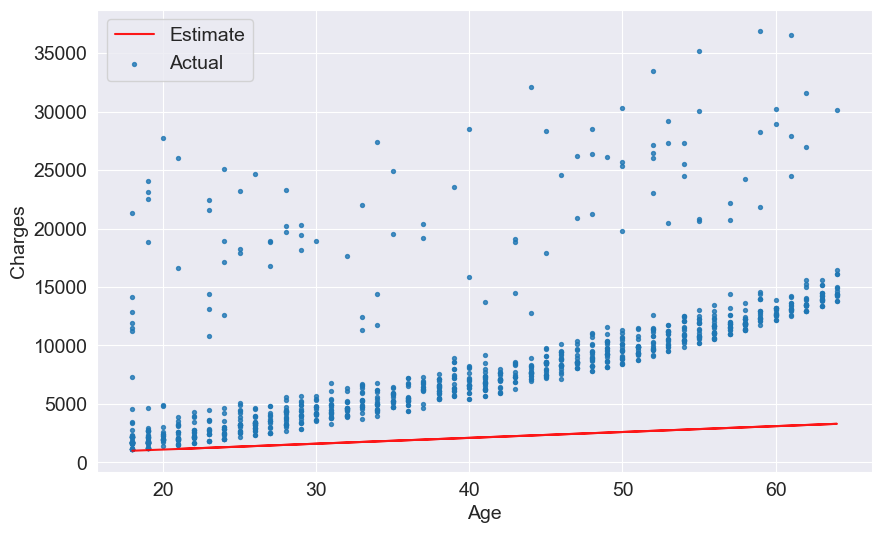

In [72]:
try_parameter(w, b)

In [73]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [74]:
rmse(targets, predicted)

8461.949562575493

In [75]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


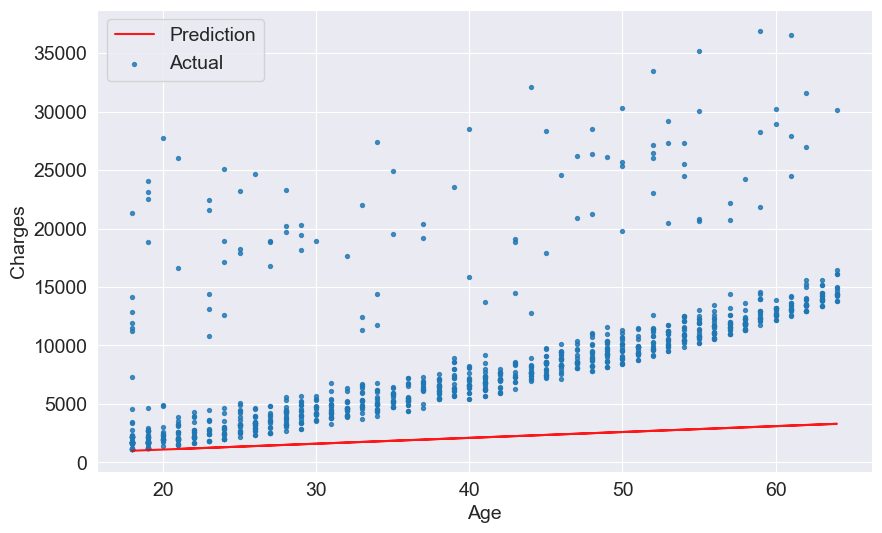

In [76]:
try_parameters(50, 100)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [53]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [54]:
model.fit(inputs, targets)

LinearRegression()

In [57]:
import numpy as np

In [58]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

C:\Users\GAYATRI BHANDGE\anaconda3\envs\jupyterlab\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [59]:
predictions = model.predict(inputs)

In [60]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [77]:
rmse(targets, predictions)

4662.505766636395

In [78]:
# w
model.coef_

array([267.24891283])

RMSE Loss:  4662.505766636395


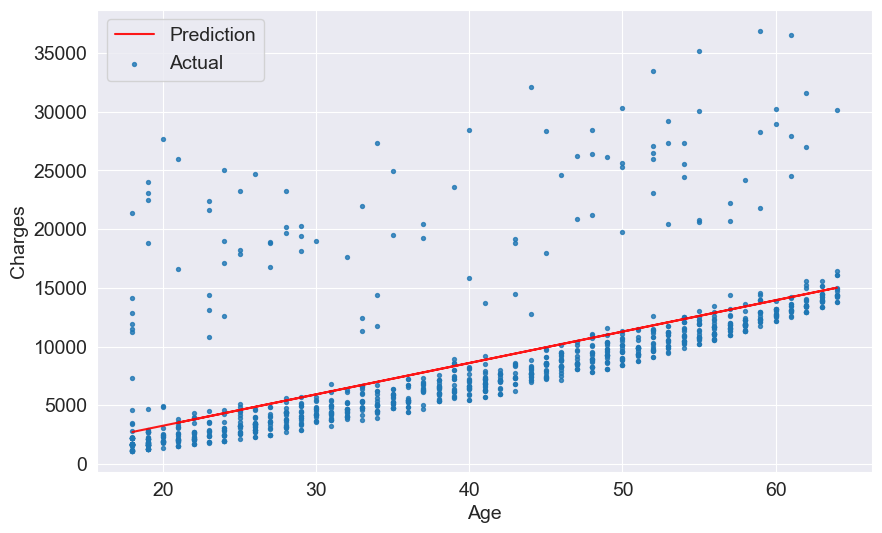

In [79]:
try_parameters(model.coef_, model.intercept_)

In [80]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [82]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [83]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

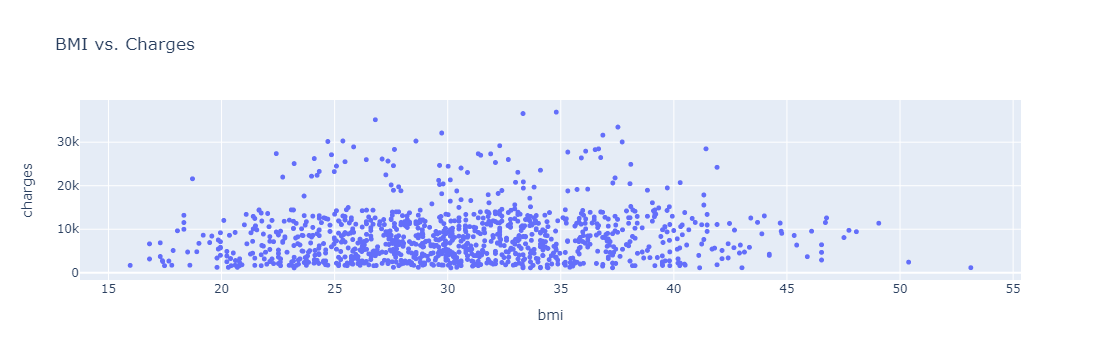

In [84]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

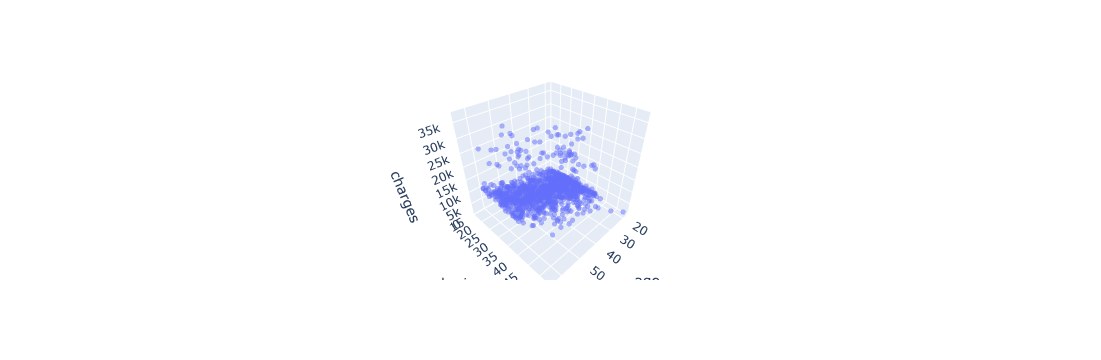

In [85]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [86]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [87]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542183

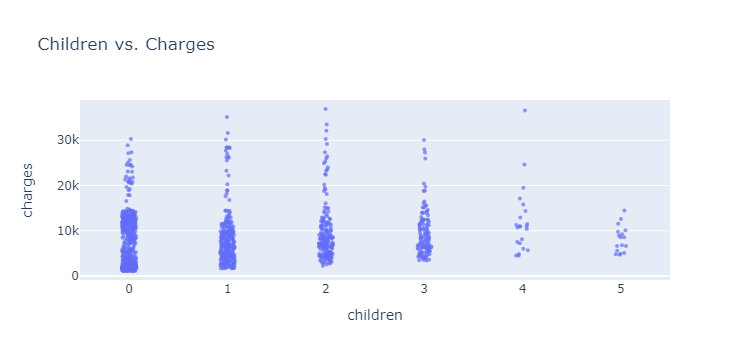

In [88]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [89]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [90]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [91]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


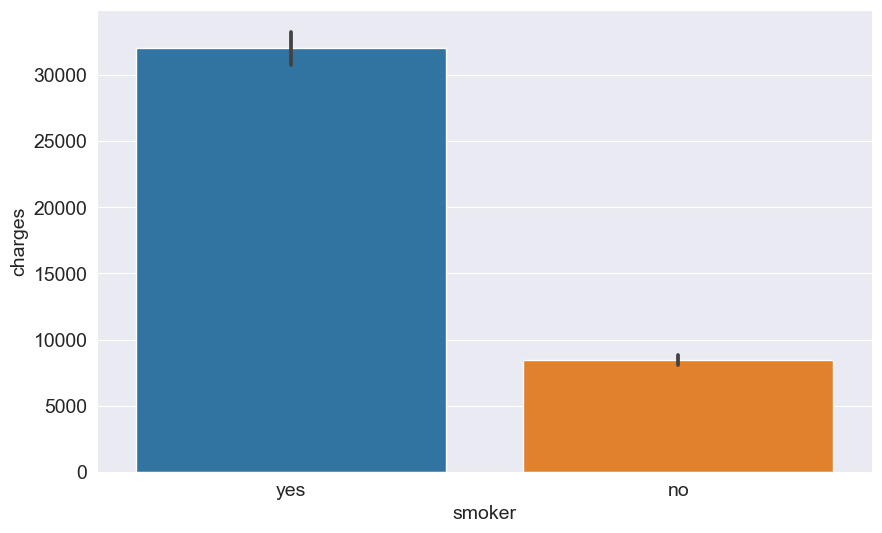

In [92]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [93]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [94]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984782

In [95]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Smoker_Numeric  smoker_code  
0                  1            1  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
...              ...          ...  
1333               0            0  
1334               0            0  
1335               0            0  
1336               0            0  
1337               1            1  

[1338 rows x 9 columns]

In [96]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

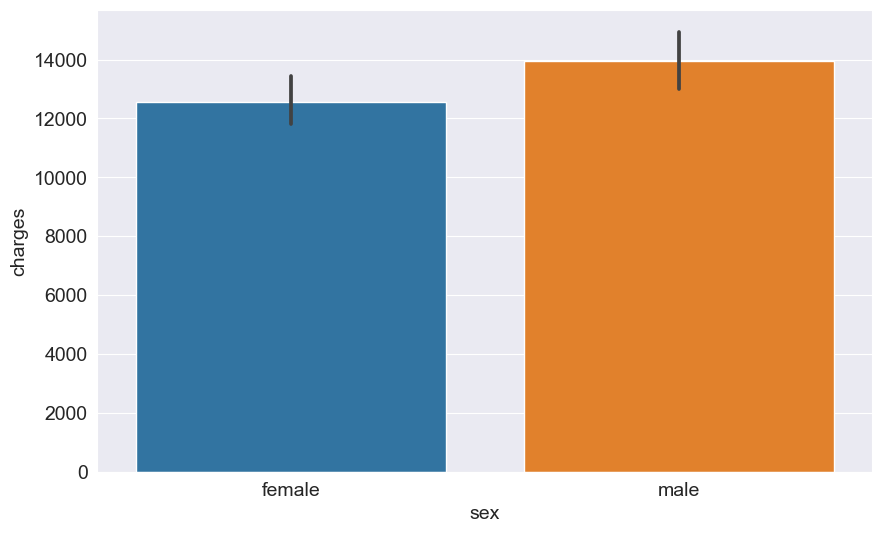

In [97]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [98]:
sex_codes = {'female': 0, 'male': 1}

In [99]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [100]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202531

In [101]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202531

In [102]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


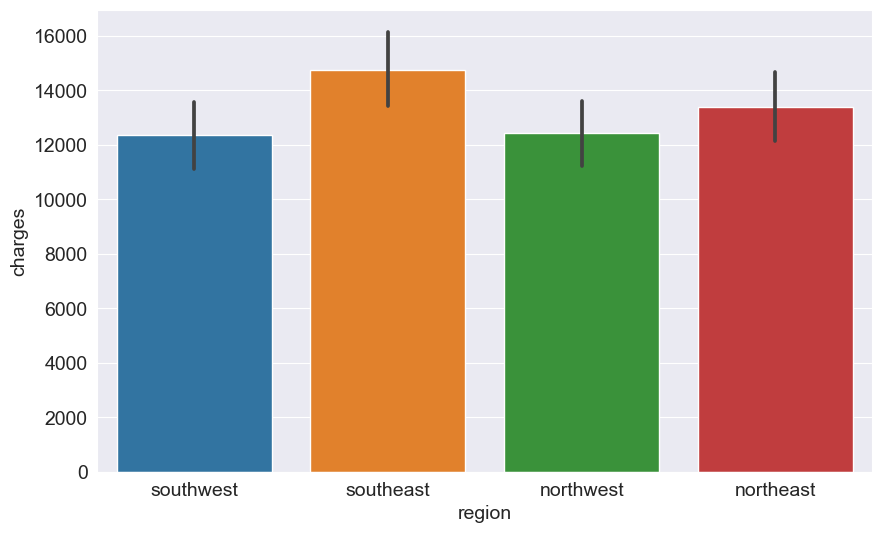

In [103]:
sns.barplot(data=medical_df, x='region', y='charges');

In [104]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [105]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [106]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [107]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      Smoker_Numeric  smoker_code  sex_code  northeast  northwest  southeast  \
0                  1            1         0        0.0        0.0        0.0   
1                  0            0         1        0.0        0.0        1.0   
2                  0            0         1        0.0        0.0        1.0   
3                  0            0         1        0.0        1.0        0.0   
4                  0            0         1        0.0        1.0        0.0   
...              ...          ...       ...        ...        ...        ...   
1333               0            0         1        0.0        1.0        0.0   
1334               0            0         0        1.0        0.0        0.0   
1335               0            0         0        0.0        0.0        1.0   
1336               0            0         0        0.0        0.0        0.0   
1337               1            1         0        0.0        1.0        0.0   

      southwest  
0           1.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
1333        0.0  
1334        0.0  
1335        0.0  
1336        1.0  
1337        0.0  

[1338 rows x 14 columns]

In [108]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
